In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17473536/17464789 [==============================] - 1s 0us/step


In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
    return results

v_train_data = vectorize_sequences(train_data)
v_test_data = vectorize_sequences(test_data)

from keras.utils.np_utils import to_categorical

o_train_label = np.asarray(train_labels).astype('float32')
o_test_label = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
val_v_data = v_train_data[:10000]
train_v_data = v_train_data[10000:]
val_v_label = o_train_label[:10000]
train_v_label = o_train_label[10000:]

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(train_v_data,
                    train_v_label,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (val_v_data, val_v_label))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.6932 - acc: 0.4991 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 8/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6931 - a

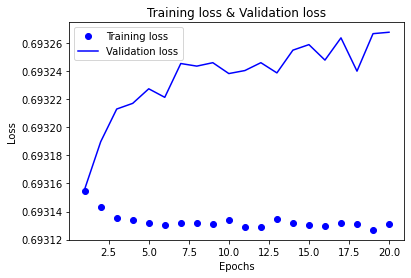

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epoch = range(1, len(loss) + 1)

plt.title('Training loss & Validation loss')
plt.plot(epoch, loss, 'bo', label = 'Training loss')
plt.plot(epoch, val_loss, 'b', label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

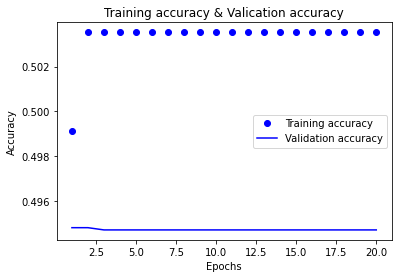

In [ ]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epoch = range(1, len(acc) + 1)

plt.title('Training accuracy & Valication accuracy')
plt.plot(epoch, acc, 'bo', label = 'Training accuracy')
plt.plot(epoch, val_acc, 'b', label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
result = model.evaluate(v_test_data, o_test_label)

782/782 [==============================] - 1s 2ms/step - loss: 0.6932 - acc: 0.5000


In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

model.fit(train_v_data,
          train_v_label,
          epochs = 4,
          batch_size = 512)

results = model.evaluate(v_test_data, o_test_label)

Epoch 1/4
30/30 [==============================] - 1s 27ms/step - loss: 0.6931 - acc: 0.5035
Epoch 2/4
30/30 [==============================] - 1s 26ms/step - loss: 0.6931 - acc: 0.5035
Epoch 3/4
30/30 [==============================] - 1s 26ms/step - loss: 0.6931 - acc: 0.5035
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.6932 - acc: 0.5000
